In [1]:
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import corr, countDistinct, count, col
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

C:\Users\Kamila Nita\AppData\Roaming\Python\Python39\site-packages\pyspark\pandas\__init__.py:49: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
spark = SparkSession.builder.appName('IO').getOrCreate()

In [3]:
schema = StructType([
    StructField("Index", IntegerType(), True),
    StructField("Name", StringType(), True),
    StructField("Sex", StringType(), True),
    StructField("Age", DoubleType(), True),
    StructField("Team", StringType(), True),
    StructField("NOC", StringType(), True),
    StructField("Games", StringType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Season", StringType(), True),
    StructField("City", StringType(), True),
    StructField("Sport", StringType(), True),
    StructField("Event", StringType(), True),
    StructField("Medal", StringType(), True),
])

In [4]:
summer_athletes = spark.read.format("csv").option("header", "true").option("delimiter", ",") \
  .option("quote", "\"") \
  .option("escape", "\"") \
  .schema(schema) \
  .load("Athletes_summer_games.csv")

# Time 4.4s

In [5]:
summer_athletes.show()

# Time 2.7s

+-----+--------------------+---+----+--------------+---+-----------+----+------+-----------+----------+--------------------+------+
|Index|                Name|Sex| Age|          Team|NOC|      Games|Year|Season|       City|     Sport|               Event| Medal|
+-----+--------------------+---+----+--------------+---+-----------+----+------+-----------+----------+--------------------+------+
|    0|           A Dijiang|  M|24.0|         China|CHN|1992 Summer|1992|Summer|  Barcelona|Basketball|Basketball Men's ...|  null|
|    1|            A Lamusi|  M|23.0|         China|CHN|2012 Summer|2012|Summer|     London|      Judo|Judo Men's Extra-...|  null|
|    2| Gunnar Nielsen Aaby|  M|24.0|       Denmark|DEN|1920 Summer|1920|Summer|  Antwerpen|  Football|Football Men's Fo...|  null|
|    3|Edgar Lindenau Aabye|  M|34.0|Denmark/Sweden|DEN|1900 Summer|1900|Summer|      Paris|Tug-Of-War|Tug-Of-War Men's ...|  Gold|
|   26|Cornelia "Cor" Aa...|  F|18.0|   Netherlands|NED|1932 Summer|1932|Sum

In [6]:
summer_athletes.printSchema()

# Time 0.0s

root
 |-- Index: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [113]:
num_row = summer_athletes.count()
num_col = len(summer_athletes.columns)

print("Summer Athletes Data Frame shape: ", num_col, ".", num_row)

# Time 0.2s

Summer Athletes Data Frame shape:  13 . 237673


In [114]:
desc = summer_athletes.describe()

desc.show()

# Time 7.5s

+-------+------------------+--------------------+------+------------------+-----------+------+-----------+------------------+------+---------+--------------+--------------------+------+
|summary|             Index|                Name|   Sex|               Age|       Team|   NOC|      Games|              Year|Season|     City|         Sport|               Event| Medal|
+-------+------------------+--------------------+------+------------------+-----------+------+-----------+------------------+------+---------+--------------+--------------------+------+
|  count|            237673|              237673|237673|            228484|     237673|237673|     237673|            237673|237673|   237673|        237673|              237673| 36537|
|   mean|126947.99052058921|                null|  null|25.746266697011606|       null|  null|       null|1979.0962456820926|  null|     null|          null|                null|  null|
| stddev|  82093.4601040641|                null|  null| 6.63872048119

In [31]:
count_value_of_teams = summer_athletes.groupBy("Team").count()
count_value_of_teams = count_value_of_teams.orderBy("count", ascending=False)
count_value_of_teams.printSchema()
count_value_of_teams.show()

# Time 0.6s

root
 |-- Team: string (nullable = true)
 |-- count: long (nullable = false)

+-------------+-----+
|         Team|count|
+-------------+-----+
|United States|15002|
|Great Britain|10842|
|       France|10554|
|        Italy| 8575|
|      Germany| 7960|
|    Australia| 7605|
|       Canada| 7170|
|        Japan| 7020|
|      Hungary| 6326|
|       Sweden| 5987|
|  Netherlands| 5429|
|        Spain| 5259|
|       Poland| 5112|
|        China| 4753|
| Soviet Union| 4584|
|  Switzerland| 4129|
|       Brazil| 4124|
|       Russia| 4088|
|  South Korea| 3922|
|      Romania| 3842|
+-------------+-----+
only showing top 20 rows



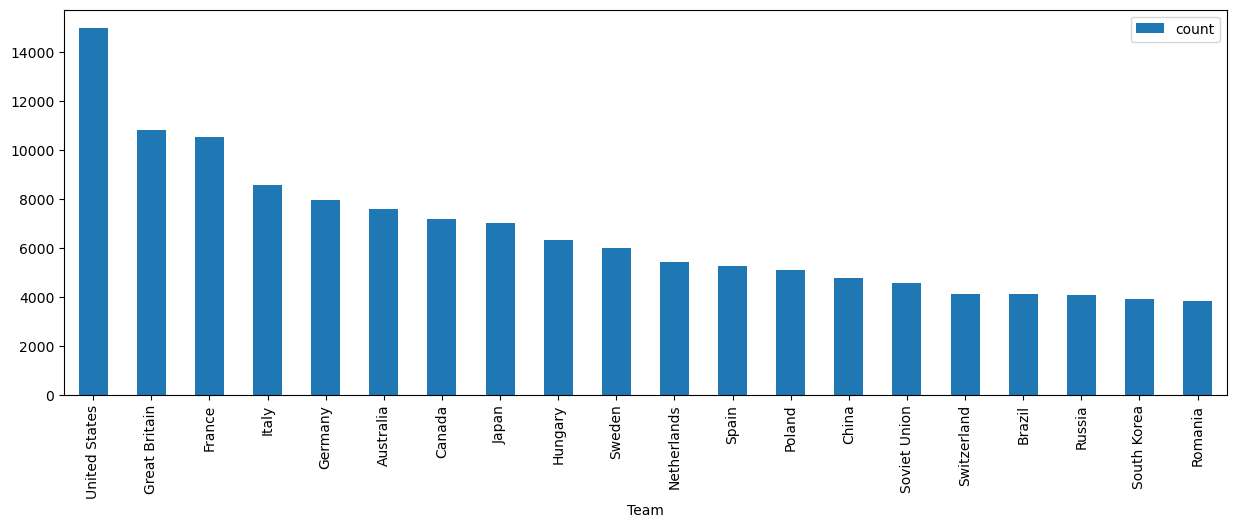

In [32]:
count_value_of_teams_df =  count_value_of_teams.limit(20).toPandas()

count_value_of_teams_df.plot(kind='bar', x='Team', y='count', figsize=(15,5))
plt.show()

# Time 0.7s

<AxesSubplot:>

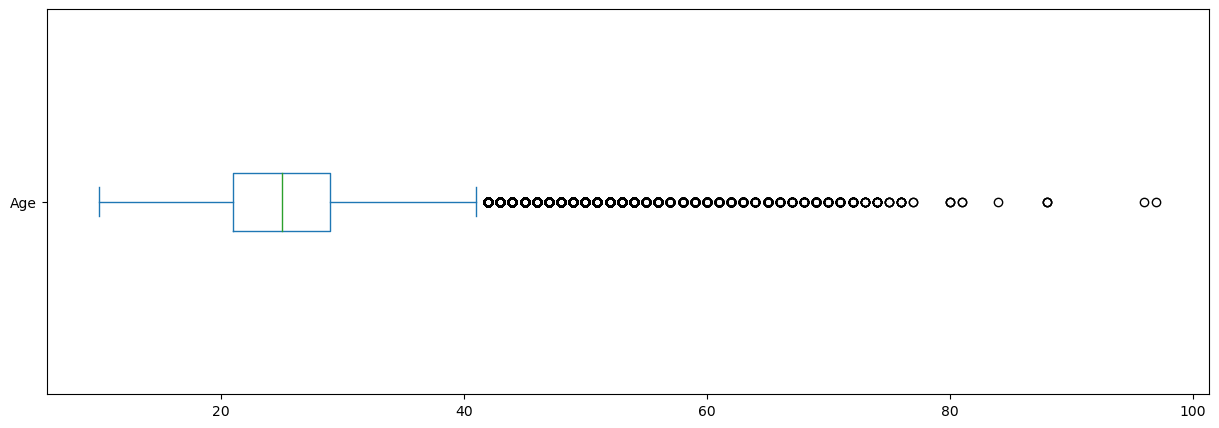

In [116]:
age_of_athletes = summer_athletes.select("Age")

age_of_athletes_pandas = age_of_athletes.toPandas()
age_of_athletes_pandas.plot(kind='box', vert=False, figsize=(15,5))

# Time 1.0s

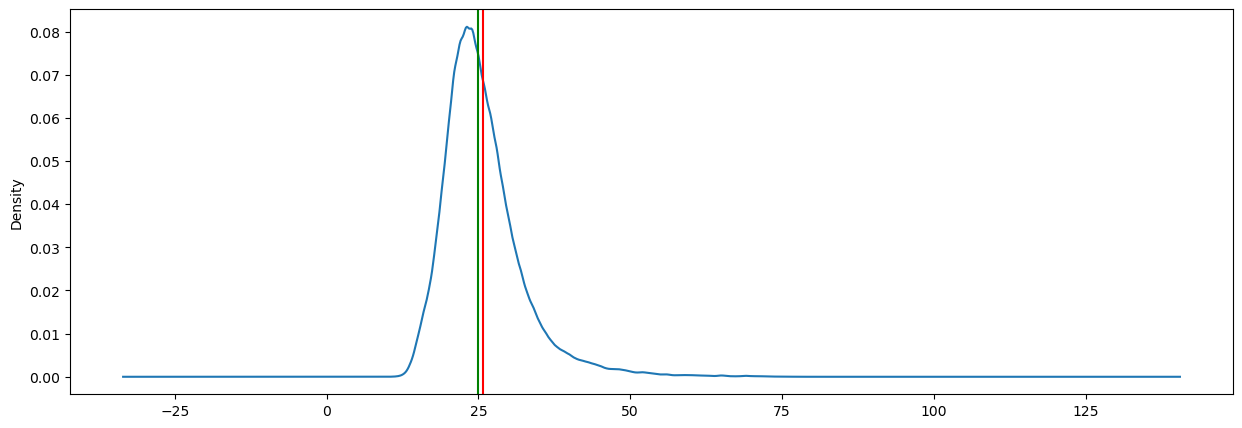

In [115]:
ax = age_of_athletes_pandas['Age'].plot(kind='density', figsize=(15,5))
ax.axvline(age_of_athletes_pandas['Age'].mean(), color='red')
ax.axvline(age_of_athletes_pandas['Age'].median(), color='green')

# Time 8.6s

<AxesSubplot:ylabel='Frequency'>

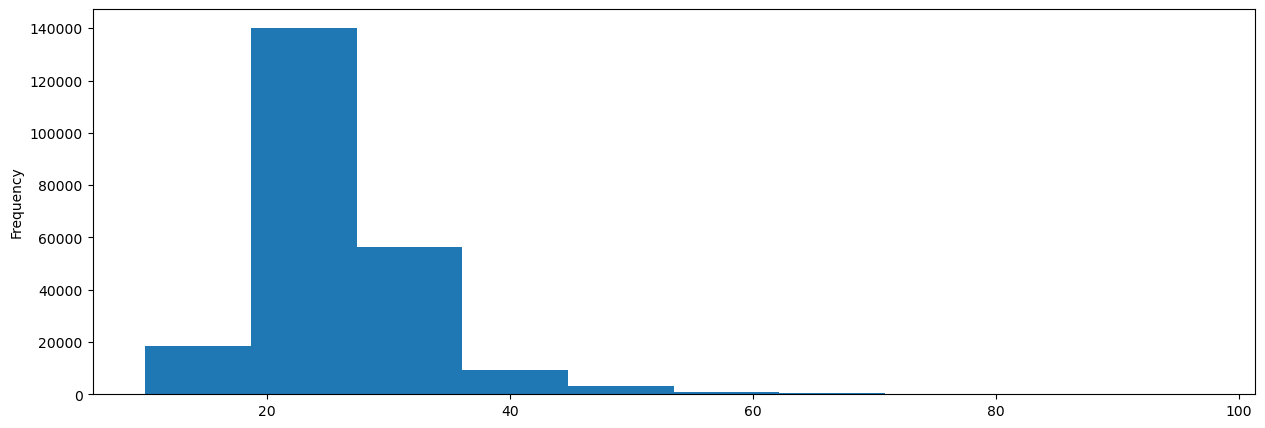

In [136]:
age_of_athletes_pandas['Age'].plot(kind='hist', figsize=(15,5))

# Time 0.2s

In [117]:
summer_athletes.agg({'Age':'mean'}).show()

# Time 0.2s

+------------------+
|          avg(Age)|
+------------------+
|25.746266697011606|
+------------------+



In [118]:
summer_athletes.agg({'Age':'min'}).show()

# Time 0.1s

+--------+
|min(Age)|
+--------+
|    10.0|
+--------+



In [119]:
summer_athletes.where(summer_athletes.Age == 10).show()

# Time 0.3s

+------+------------------+---+----+--------------------+---+-----------+----+------+------+----------+--------------------+------+
| Index|              Name|Sex| Age|                Team|NOC|      Games|Year|Season|  City|     Sport|               Event| Medal|
+------+------------------+---+----+--------------------+---+-----------+----+------+------+----------+--------------------+------+
|142882|Dimitrios Loundras|  M|10.0|Ethnikos Gymnasti...|GRE|1896 Summer|1896|Summer|Athina|Gymnastics|Gymnastics Men's ...|Bronze|
+------+------------------+---+----+--------------------+---+-----------+----+------+------+----------+--------------------+------+



In [120]:
summer_athletes.agg({'Age':'max'}).show()

# Time 0.1s

+--------+
|max(Age)|
+--------+
|    97.0|
+--------+



In [121]:
summer_athletes.where(summer_athletes.Age == 97).show()

# Time 0.3s

+------+--------------------+---+----+-------------+---+-----------+----+------+---------+----------------+--------------------+-----+
| Index|                Name|Sex| Age|         Team|NOC|      Games|Year|Season|     City|           Sport|               Event|Medal|
+------+--------------------+---+----+-------------+---+-----------+----+------+---------+----------------+--------------------+-----+
|257054|John Quincy Adams...|  M|97.0|United States|USA|1928 Summer|1928|Summer|Amsterdam|Art Competitions|Art Competitions ...| null|
+------+--------------------+---+----+-------------+---+-----------+----+------+---------+----------------+--------------------+-----+



+----+--------+
|Year|min(Age)|
+----+--------+
|1896|    10.0|
|1924|    13.0|
|1908|    14.0|
|1952|    13.0|
|1956|    13.0|
|1988|    13.0|
|1968|    11.0|
|1904|    14.0|
|2004|    13.0|
|1932|    13.0|
|1996|    12.0|
|1960|    12.0|
|2012|    13.0|
|1912|    13.0|
|2016|    13.0|
|1936|    12.0|
|1920|    13.0|
|1906|    13.0|
|1980|    13.0|
|1972|    12.0|
+----+--------+
only showing top 20 rows



<AxesSubplot:xlabel='Year'>

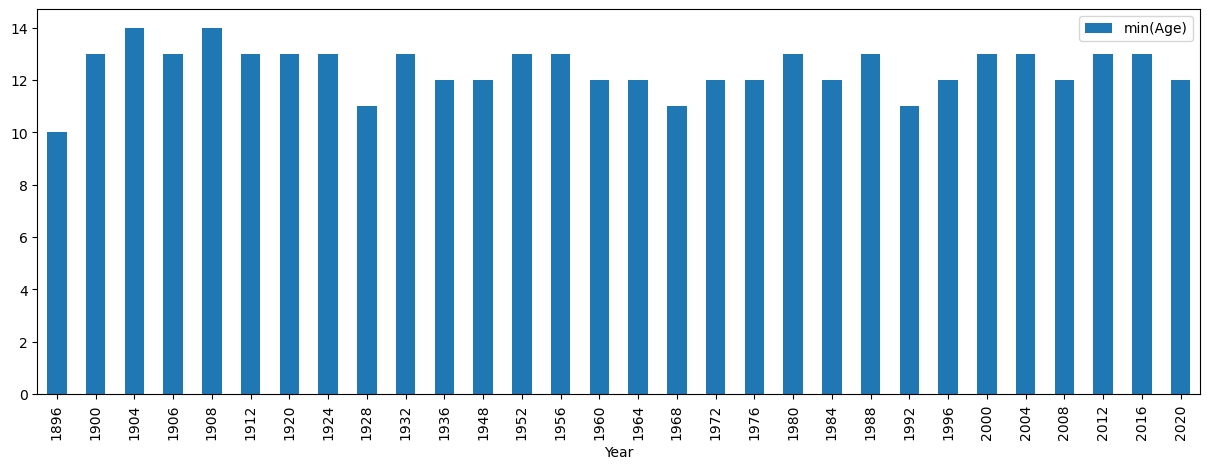

In [122]:
min_age_per_IO = summer_athletes.groupBy("Year", ).min("Age")

min_age_per_IO.show()
min_age_per_IO = min_age_per_IO.orderBy("Year", ascending=True)
min_age_per_IO_pd = min_age_per_IO.toPandas()
min_age_per_IO_pd.plot(kind='bar', x="Year", y="min(Age)", figsize=(15,5))

# Time 0.9s

+----+--------+
|Year|max(Age)|
+----+--------+
|1896|    40.0|
|1924|    81.0|
|1908|    61.0|
|1952|    65.0|
|1956|    67.0|
|1988|    70.0|
|1968|    68.0|
|1904|    71.0|
|2004|    57.0|
|1932|    96.0|
|1996|    63.0|
|1960|    65.0|
|2012|    71.0|
|1912|    67.0|
|2016|    62.0|
|1936|    74.0|
|1920|    72.0|
|1906|    54.0|
|1980|    70.0|
|1972|    69.0|
+----+--------+
only showing top 20 rows



<AxesSubplot:xlabel='Year'>

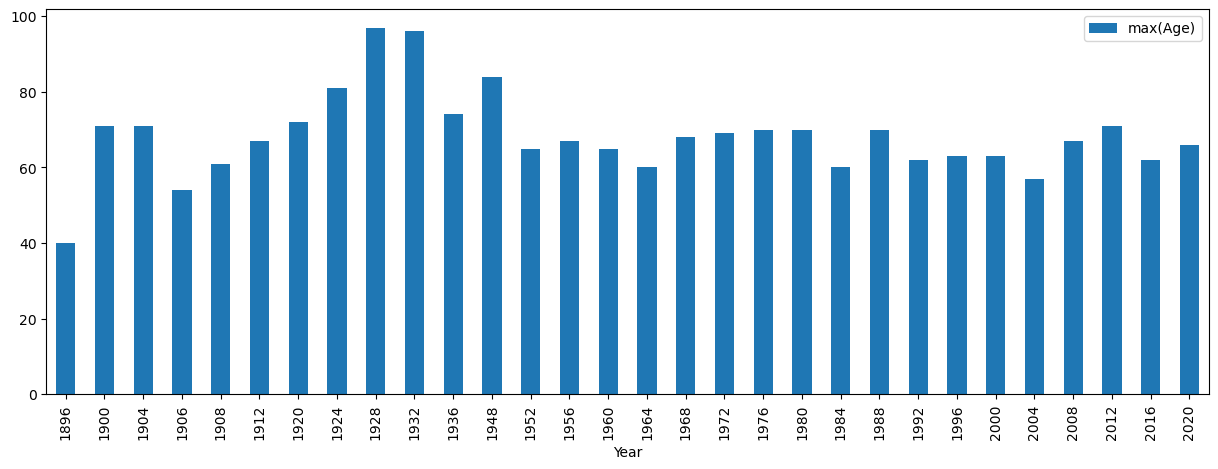

In [123]:
min_age_per_IO = summer_athletes.groupBy("Year", ).max("Age")

min_age_per_IO.show()
min_age_per_IO = min_age_per_IO.orderBy("Year", ascending=True)
min_age_per_IO_pd = min_age_per_IO.toPandas()
min_age_per_IO_pd.plot(kind='bar', x="Year", y="max(Age)", figsize=(15,5))

# Time 0.9s


In [124]:
summer_athletes.select(corr("Age", "Year")).show()

# Time 0.1s

+--------------------+
|     corr(Age, Year)|
+--------------------+
|-0.10625337447190572|
+--------------------+



In [125]:
athletes_per_sex = summer_athletes.groupBy("Sex").count()

athletes_per_sex.show()

# Time 0.1s

+---+------+
|Sex| count|
+---+------+
|  F| 66709|
|  M|170964|
+---+------+



<AxesSubplot:ylabel='count'>

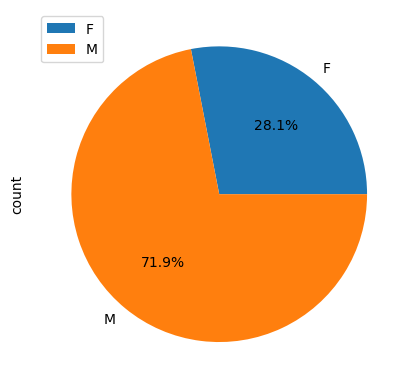

In [135]:
athletes_per_sex_pd = athletes_per_sex.toPandas()

athletes_per_sex_pd.plot(kind="pie", y="count", labels=athletes_per_sex_pd["Sex"], autopct="%1.1f%%")

# Time 0.1s

In [31]:
games = summer_athletes.groupBy("Games") \
                        .agg(count('*').alias('count')) \
                        .orderBy('count', ascending=False)

games.orderBy("Games", ascending=True).show()

# Time = 2.5s

+-----------+-----+
|      Games|count|
+-----------+-----+
|1896 Summer|  380|
|1900 Summer| 1936|
|1904 Summer| 1301|
|1906 Summer| 1733|
|1908 Summer| 3101|
|1912 Summer| 4040|
|1920 Summer| 4292|
|1924 Summer| 5233|
|1928 Summer| 4992|
|1932 Summer| 2969|
|1936 Summer| 6506|
|1948 Summer| 6405|
|1952 Summer| 8270|
|1956 Summer| 5127|
|1960 Summer| 8119|
|1964 Summer| 7702|
|1968 Summer| 8588|
|1972 Summer|10304|
|1976 Summer| 8641|
|1980 Summer| 7191|
+-----------+-----+
only showing top 20 rows



<AxesSubplot:xlabel='Games'>

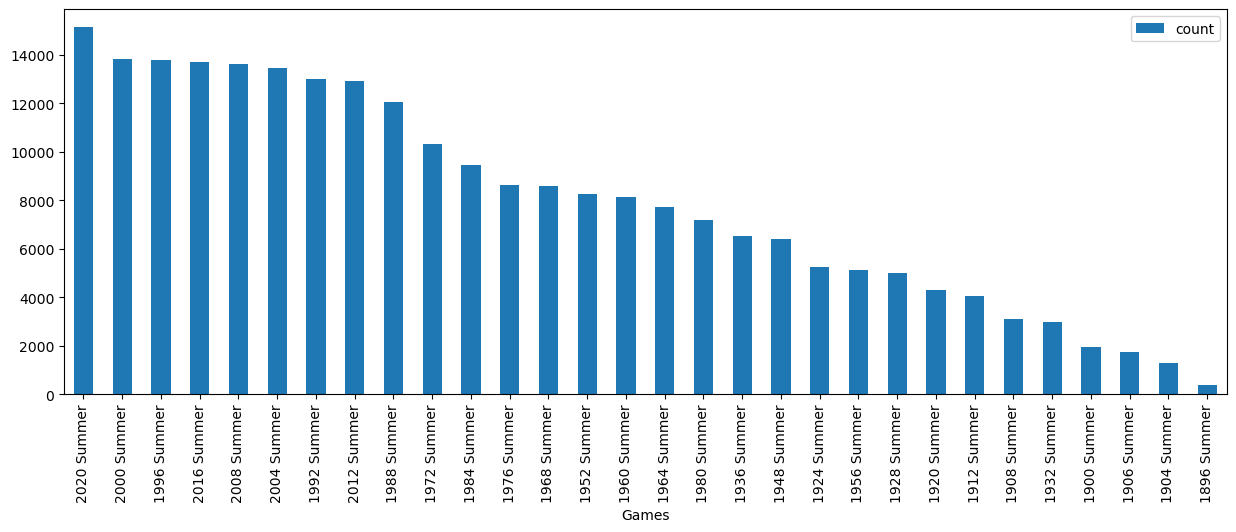

In [32]:
games_pd = games.toPandas()

games_pd.plot(kind='bar', x='Games', y='count', figsize=(15,5))

# Time = 1.7s

In [6]:
athletes_per_city = summer_athletes.groupBy("City").count()
athletes_per_city = athletes_per_city.orderBy("count")
athletes_per_city.show()

# Time = 0.7s

+--------------+-----+
|          City|count|
+--------------+-----+
|     St. Louis| 1301|
|     Antwerpen| 4292|
|     Stockholm| 4338|
|     Melbourne| 4829|
|     Amsterdam| 4992|
|        Berlin| 6506|
|         Paris| 7169|
|        Moskva| 7191|
|          Roma| 8119|
|      Helsinki| 8270|
|   Mexico City| 8588|
|      Montreal| 8641|
|        Munich|10304|
|         Seoul|12037|
|   Los Angeles|12423|
|     Barcelona|12977|
|       Beijing|13602|
|Rio de Janeiro|13688|
|       Atlanta|13780|
|        Sydney|13821|
+--------------+-----+
only showing top 20 rows



<AxesSubplot:ylabel='count'>

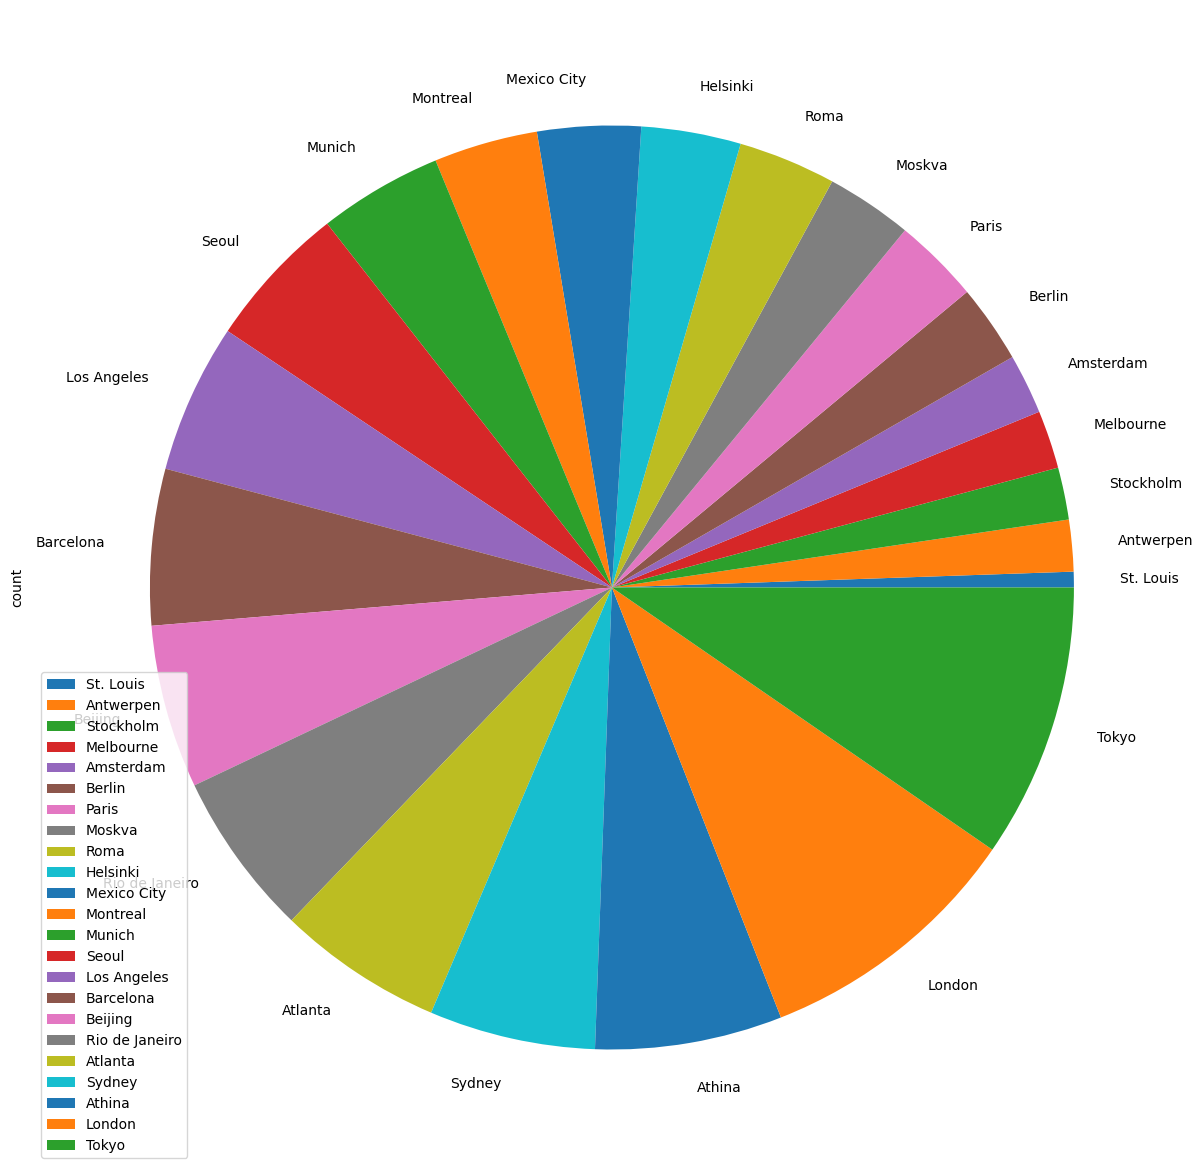

In [8]:
athletes_per_city_pd = athletes_per_city.toPandas()

athletes_per_city_pd.plot(kind='pie',y='count', labels=athletes_per_city_pd["City"], figsize=(15,15))

# Time = 1.2s

In [11]:
athletes_per_country_IO_2022 = summer_athletes.filter(summer_athletes.Year == 2020)
athletes_per_country_IO_2022.show()

# Time 0.5s

+-----+------------------+---+----+-----------+---+-----------+----+------+-----+-------------------+--------------------+-----+
|Index|              Name|Sex| Age|       Team|NOC|      Games|Year|Season| City|              Sport|               Event|Medal|
+-----+------------------+---+----+-----------+---+-----------+----+------+-----+-------------------+--------------------+-----+
|    0|   AALERUD Katrine|  F|26.0|     Norway|NOR|2020 Summer|2020|Summer|Tokyo|       Cycling Road|   Women's Road Race| null|
|    1|   AALERUD Katrine|  F|26.0|     Norway|NOR|2020 Summer|2020|Summer|Tokyo|       Cycling Road|Women's Individua...| null|
|    2|       ABAD Nestor|  M|28.0|      Spain|ESP|2020 Summer|2020|Summer|Tokyo|Artistic Gymnastics|    Men's All-Around| null|
|    3|       ABAD Nestor|  M|28.0|      Spain|ESP|2020 Summer|2020|Summer|Tokyo|Artistic Gymnastics|Men's Floor Exercise| null|
|    4|       ABAD Nestor|  M|28.0|      Spain|ESP|2020 Summer|2020|Summer|Tokyo|Artistic Gymnast

+-------------+-----+
|         Team|count|
+-------------+-----+
|United States|  856|
|        Japan|  787|
|    Australia|  638|
|      Germany|  597|
|        China|  574|
|       Russia|  561|
|Great Britain|  548|
|       France|  538|
|        Italy|  524|
|       Canada|  509|
|        Spain|  429|
|       Brazil|  416|
|  Netherlands|  391|
|  South Korea|  338|
|       Poland|  282|
|  New Zealand|  279|
|      Hungary|  237|
|      Ukraine|  225|
| South Africa|  211|
|    Argentina|  208|
+-------------+-----+
only showing top 20 rows



<AxesSubplot:xlabel='Team'>

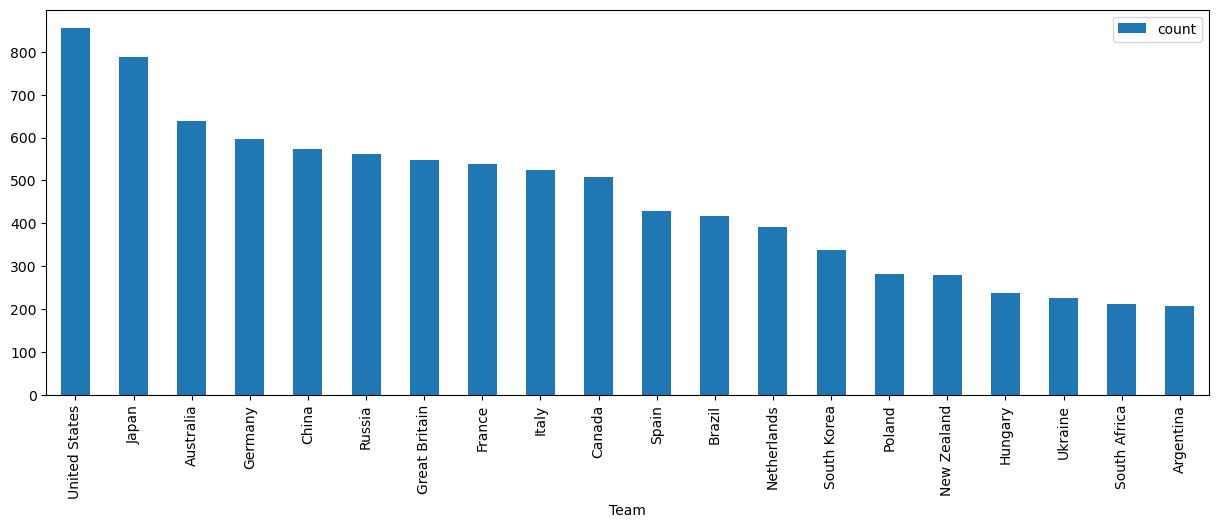

In [30]:
athletes_per_country_IO_2022_teams = athletes_per_country_IO_2022.groupBy("Team") \
                                                                .agg(count('*').alias('count')) \
                                                                .orderBy('count', ascending=False)

athletes_per_country_IO_2022_teams.show()
athletes_per_country_IO_2022_teams_pd = athletes_per_country_IO_2022_teams.limit(20).toPandas()
athletes_per_country_IO_2022_teams_pd.plot(kind='bar', x="Team", y="count", figsize=(15,5))

# Time 1.5s

In [5]:
athletes_per_sport_IO2022 = summer_athletes.filter(summer_athletes.Games == "2020 Summer") \
                                    .groupBy("Sport") \
                                    .agg(count('*').alias('count')) \
                                    .orderBy('count', ascending=False)

athletes_per_sport_IO2022.show()

# Time 4.5s

+-------------------+-----+
|              Sport|count|
+-------------------+-----+
|          Athletics| 2318|
|           Swimming| 1634|
|Artistic Gymnastics| 1061|
|           Football|  608|
|           Shooting|  577|
|             Rowing|  526|
|               Judo|  516|
|             Hockey|  432|
|      Cycling Track|  426|
|         Equestrian|  420|
|            Fencing|  419|
|       Canoe Sprint|  412|
|           Handball|  368|
|            Sailing|  350|
|       Rugby Sevens|  312|
|             Tennis|  290|
|          Wrestling|  289|
|             Boxing|  289|
|         Basketball|  288|
|         Volleyball|  288|
+-------------------+-----+
only showing top 20 rows



<AxesSubplot:xlabel='Sport'>

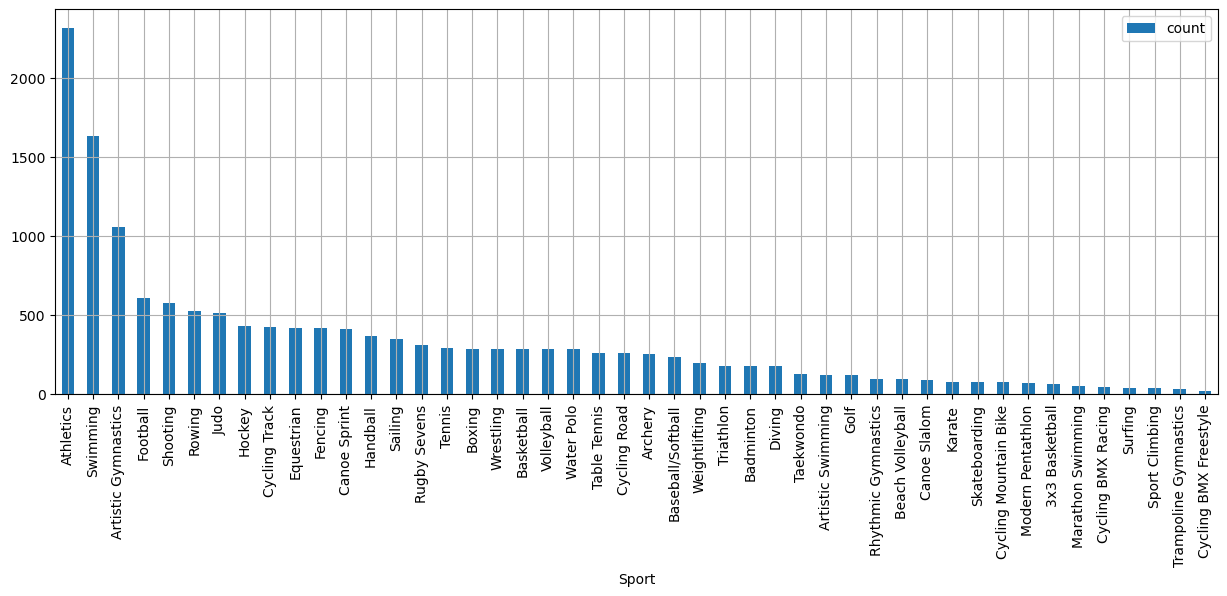

In [6]:
athletes_per_sport_IO2022_pd = athletes_per_sport_IO2022.toPandas()
athletes_per_sport_IO2022_pd.plot(kind='bar', x='Sport', y='count', figsize=(15,5), grid=True)

# Time 2.6s

In [50]:
medals_IO2020 = summer_athletes.filter(col("Games") == "2020 Summer") \
                               .filter(col("Medal").isNotNull()) \
                               .groupBy("Medal") \
                               .agg(count("*").alias("count"))

medals_IO2020.show()

# Time 0.2s

+------+-----+
| Medal|count|
+------+-----+
|Silver|  782|
|  Gold|  800|
|Bronze|  867|
+------+-----+



In [52]:
medals_IO2020.agg({'count':'sum'}).show()

# Time 0.2s

+----------+
|sum(count)|
+----------+
|      2449|
+----------+



In [54]:
summer_athletes.select('Sport').distinct().collect()

# Time 0.3s

[Row(Sport='Gymnastics'),
 Row(Sport='Tennis'),
 Row(Sport='Boxing'),
 Row(Sport='Ice Hockey'),
 Row(Sport='Golf'),
 Row(Sport='Rowing'),
 Row(Sport='Judo'),
 Row(Sport='Softball'),
 Row(Sport='Sailing'),
 Row(Sport='Swimming'),
 Row(Sport='Basketball'),
 Row(Sport='Handball'),
 Row(Sport='Equestrianism'),
 Row(Sport='Rhythmic Gymnastics'),
 Row(Sport='Triathlon'),
 Row(Sport='Badminton'),
 Row(Sport='Croquet'),
 Row(Sport='Athletics'),
 Row(Sport='Figure Skating'),
 Row(Sport='Beach Volleyball'),
 Row(Sport='Racquets'),
 Row(Sport='Polo'),
 Row(Sport='Shooting'),
 Row(Sport='Diving'),
 Row(Sport='Rugby Sevens'),
 Row(Sport='Roque'),
 Row(Sport='Wrestling'),
 Row(Sport='Table Tennis'),
 Row(Sport='Taekwondo'),
 Row(Sport='Canoeing'),
 Row(Sport='Water Polo'),
 Row(Sport='Weightlifting'),
 Row(Sport='Tug-Of-War'),
 Row(Sport='Baseball'),
 Row(Sport='Modern Pentathlon'),
 Row(Sport='Cricket'),
 Row(Sport='Rugby'),
 Row(Sport='Cycling'),
 Row(Sport='Trampolining'),
 Row(Sport='Volleyball'

In [7]:
athletes_per_sport = summer_athletes.groupBy("Sport") \
                                    .agg(count('*').alias('count')) \
                                    .orderBy('count', ascending=False)

athletes_per_sport.show()

+-------------+-----+
|        Sport|count|
+-------------+-----+
|    Athletics|40942|
|   Gymnastics|26707|
|     Swimming|24829|
|     Shooting|12025|
|      Fencing|11154|
|       Rowing|11121|
|      Cycling|10859|
|    Wrestling| 7443|
|     Football| 7353|
|      Sailing| 6936|
|Equestrianism| 6344|
|       Boxing| 6336|
|     Canoeing| 6171|
|       Hockey| 5849|
|   Basketball| 4824|
|         Judo| 4317|
|Weightlifting| 4134|
|   Water Polo| 4132|
|     Handball| 4033|
|   Volleyball| 3692|
+-------------+-----+
only showing top 20 rows



<AxesSubplot:xlabel='Sport'>

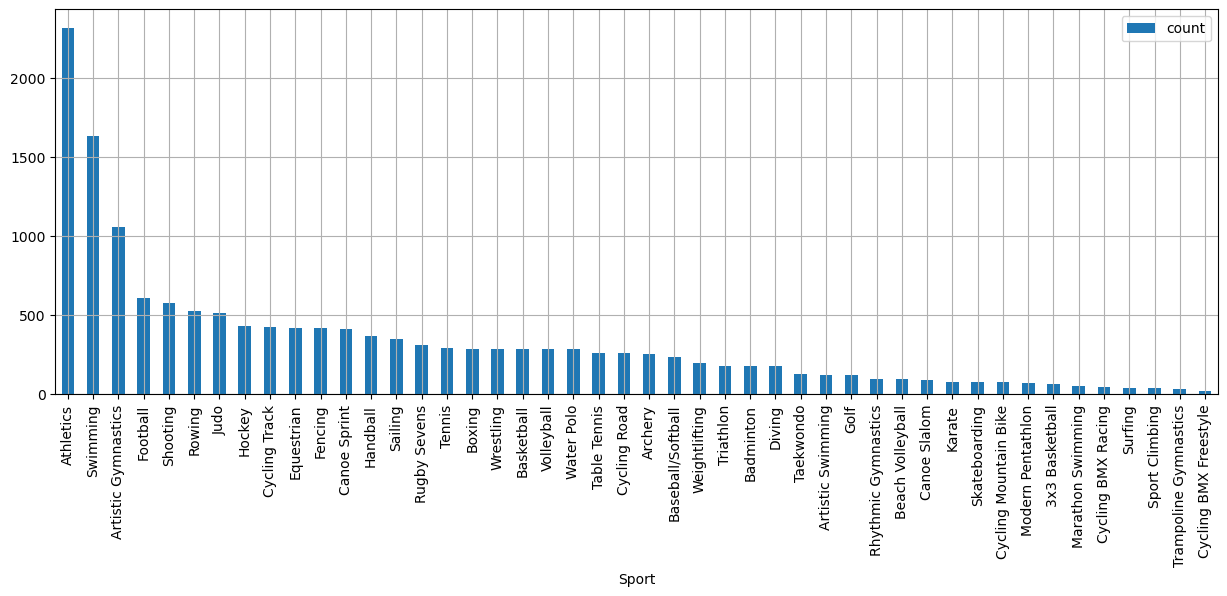

In [8]:
athletes_per_sport_pd = athletes_per_sport_IO2022.toPandas()
athletes_per_sport_pd.plot(kind='bar', x='Sport', y='count', figsize=(15,5), grid=True)

In [9]:
medals = summer_athletes.filter(col("Medal").isNotNull()) \
                               .groupBy("Medal") \
                               .agg(count("*").alias("count"))

medals.show()

+------+-----+
| Medal|count|
+------+-----+
|Silver|12002|
|  Gold|12259|
|Bronze|12276|
+------+-----+



<AxesSubplot:ylabel='count'>

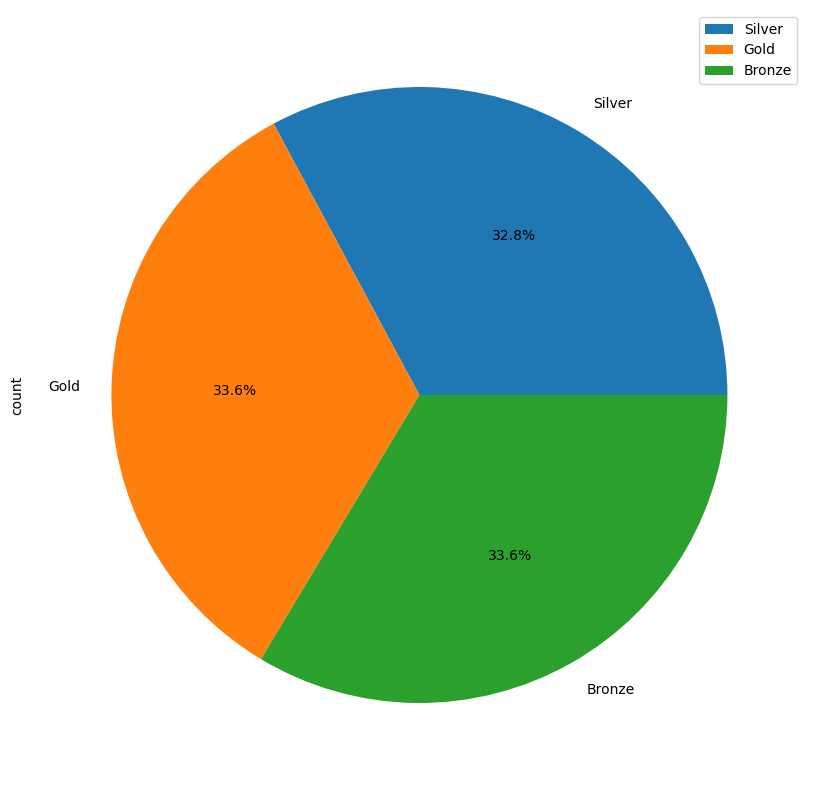

In [16]:
medals_pd = medals.toPandas()
medals_pd.plot(kind='pie', y='count', labels=medals_pd['Medal'], figsize=(10,10), autopct="%1.1f%%")

In [17]:
polish_athletes = summer_athletes.filter(summer_athletes.NOC == "POL")

polish_athletes.show()

+-----+--------------------+---+----+------+---+-----------+----+------+---------+---------+--------------------+------+
|Index|                Name|Sex| Age|  Team|NOC|      Games|Year|Season|     City|    Sport|               Event| Medal|
+-----+--------------------+---+----+------+---+-----------+----+------+---------+---------+--------------------+------+
|  901|Mariola Teresa Ab...|  F|21.0|Poland|POL|1980 Summer|1980|Summer|   Moskva|   Rowing|Rowing Women's Co...|  null|
| 1325|Kazimierz Piotr A...|  M|23.0|Poland|POL|1980 Summer|1980|Summer|   Moskva|   Boxing|Boxing Men's Ligh...|Bronze|
| 1386|     Stefan Adamczak|  M|31.0|Poland|POL|1924 Summer|1924|Summer|    Paris|Athletics|Athletics Men's P...|  null|
| 1388|    Dariusz Adamczuk|  M|22.0|Poland|POL|1992 Summer|1992|Summer|Barcelona| Football|Football Men's Fo...|Silver|
| 1389|Adam Eucharyst Ad...|  M|21.0|Poland|POL|1972 Summer|1972|Summer|   Munich|     Judo|Judo Men's Middle...|  null|
| 1390|Adam Eucharyst Ad...|  M|

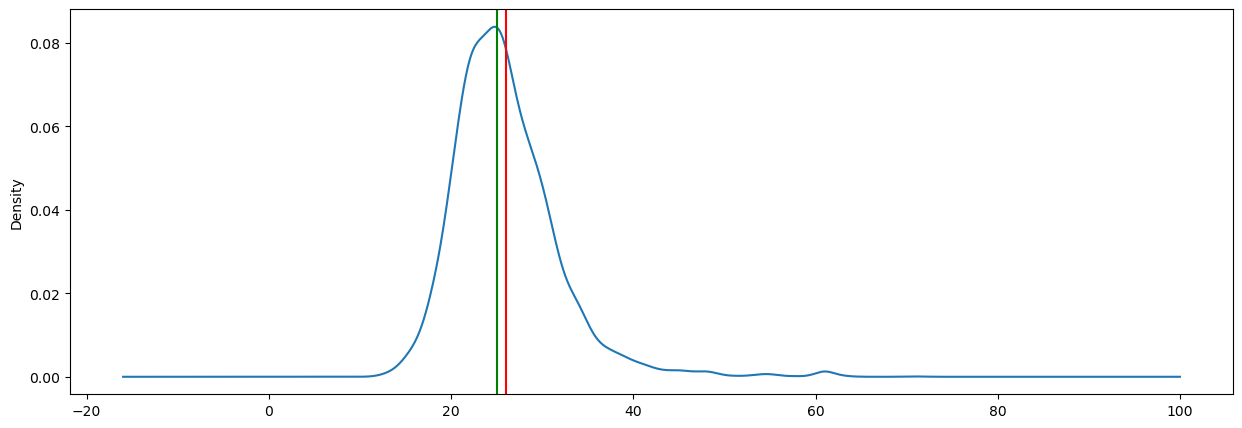

In [19]:
polish_athletes_age = polish_athletes.select('Age')

polish_athletes_age_pd = polish_athletes_age.toPandas()

ax = polish_athletes_age_pd['Age'].plot(kind='density', figsize=(15,5))
ax.axvline(polish_athletes_age_pd['Age'].mean(), color='red')
ax.axvline(polish_athletes_age_pd['Age'].median(), color='green')


In [20]:
polish_athletes_per_sex = polish_athletes.groupBy("Sex").count()

polish_athletes_per_sex.show()

+---+-----+
|Sex|count|
+---+-----+
|  F| 1460|
|  M| 3687|
+---+-----+



<AxesSubplot:ylabel='count'>

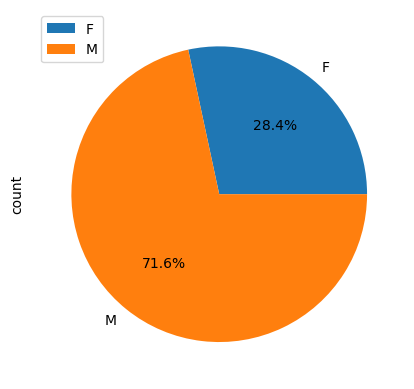

In [21]:
polish_athletes_per_sex_pd = polish_athletes_per_sex.toPandas()

polish_athletes_per_sex_pd.plot(kind="pie", y="count", labels=polish_athletes_per_sex_pd["Sex"], autopct="%1.1f%%")

In [23]:
polish_medals = polish_athletes.filter(col("Medal").isNotNull()) \
                               .groupBy("Medal") \
                               .agg(count("*").alias("count"))

polish_medals.show()

+------+-----+
| Medal|count|
+------+-----+
|Silver|  199|
|  Gold|  125|
|Bronze|  250|
+------+-----+



In [28]:
polish_athletes.filter(col("Name") == 'Elbieta Rozalia Apostolska (-Kamiska)').show()

+-----+--------------------+---+----+------+---+-----------+----+------+-----+----------+--------------------+-----+
|Index|                Name|Sex| Age|  Team|NOC|      Games|Year|Season| City|     Sport|               Event|Medal|
+-----+--------------------+---+----+------+---+-----------+----+------+-----+----------+--------------------+-----+
| 8575|Elbieta Rozalia A...|  F|20.0|Poland|POL|1964 Summer|1964|Summer|Tokyo|Gymnastics|Gymnastics Women'...| null|
| 8576|Elbieta Rozalia A...|  F|20.0|Poland|POL|1964 Summer|1964|Summer|Tokyo|Gymnastics|Gymnastics Women'...| null|
| 8577|Elbieta Rozalia A...|  F|20.0|Poland|POL|1964 Summer|1964|Summer|Tokyo|Gymnastics|Gymnastics Women'...| null|
| 8578|Elbieta Rozalia A...|  F|20.0|Poland|POL|1964 Summer|1964|Summer|Tokyo|Gymnastics|Gymnastics Women'...| null|
| 8579|Elbieta Rozalia A...|  F|20.0|Poland|POL|1964 Summer|1964|Summer|Tokyo|Gymnastics|Gymnastics Women'...| null|
| 8580|Elbieta Rozalia A...|  F|20.0|Poland|POL|1964 Summer|1964

In [36]:
polish_athletes_pd = polish_athletes.toPandas()

polish_athletes_pd.to_csv('polish_athletes_pyspark.csv', encoding='utf-8')